In [16]:
import requests

In [17]:
from bs4 import BeautifulSoup

In [6]:
base_url:str = "https://allbooksworld.com/page/{page_number}/"

In [7]:
def generate_url(url:str, page_number:int) -> str:
    """generate url with page number

    Args:
        url (str): url to scrape
        page_number (int): page number of the url

    Returns:
        str: modified url with pagination
    """
    return url.format(page_number=page_number)


In [8]:
url:str = generate_url(base_url, 1)

In [13]:
response = requests.get(url)

'<!DOCTYPE html><html lang="en-US"><head><meta charset="UTF-8" /><meta name="viewport" content="width=device-width, initial-scale=1"><link rel="profile" href="https://gmpg.org/xfn/11" /><link rel="pingback" href="https://allbooksworld.com/xmlrpc.php" /><meta name=\'robots\' content=\'index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1\' /><link media="all" href="https://allbooksworld.com/wp-content/cache/autoptimize/css/autoptimize_907df761bc51fb96cf4ef40adb41e828.css" rel="stylesheet"><title>AllBooksWorld.com - Read Books for Life</title><meta name="description" content="Read Books for Life" /><link rel="canonical" href="https://allbooksworld.com/" /><link rel="next" href="https://allbooksworld.com/page/2/" /><meta property="og:locale" content="en_US" /><meta property="og:type" content="website" /><meta property="og:title" content="AllBooksWorld.com" /><meta property="og:description" content="Read Books for Life" /><meta property="og:url" content="https://allb
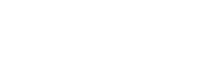
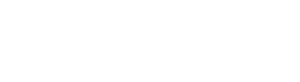

In [15]:
response.text

In [ ]:
soup = BeautifulSoup(response.text, "html.parser")
print(soup.prettify())

In [19]:
section = soup.find("section", id="content")

In [25]:
articles = section.find_all("article", class_="post")

In [26]:
article = articles[0]

In [37]:
book_name = article.find(class_="post-title").text.strip()
book_name

'Fool Me Twice by A.M. Rose ePub Download'

In [38]:
book_info_link = article.find(class_="post-title").a["href"]

'https://allbooksworld.com/fool-me-twice-by-a-m-rose-epub-download/'

In [41]:
def create_soup(url:str) -> BeautifulSoup:
    """get successful response using requests and then
    create soup object

    Args:
        url (str): url to create soup

    Returns:
        BeautifulSoup: soup object
    """
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, "html.parser")
        return soup
    except Exception as e:
        raise e


def get_book_articles(soup):
    articles = soup.find_all("article", class_="post")
    return articles

def get_book_name(book_article):
    return book_article.find(class_="post-title").text.strip()

def get_book_info_link(book_article):
    return book_article.find(class_="post-title").a["href"].text.strip()

def get_book_info_urls(url:str) -> dict:
    """get book info urls from given url by using BeautifulSoup

    Args:
        url (str): page url to scrape

    Returns:
        dict: { name_of_book : url_of_book }
    """
    soup = create_soup(url)
    articles = get_book_articles(soup)
    urls = {}
    for article in articles:
        book_name = get_book_name(article)
        book_info_url = get_book_info_link(article)
        urls[book_name] = book_info_url
    return urls

In [42]:
book_info_urls = get_book_info_urls(url)
book_info_urls

{'Fool Me Twice by A.M. Rose ePub Download': 'https://allbooksworld.com/fool-me-twice-by-a-m-rose-epub-download/',
 'Road to Mastery 4 by Valerios ePub Download': 'https://allbooksworld.com/road-to-mastery-4-by-valerios-epub-download/',
 'The Captain and the Duchess by Alexa Aston ePub Download': 'https://allbooksworld.com/the-captain-and-the-duchess-by-alexa-aston-epub-download/',
 'Not in Love by Ali Hazelwood ePub Download': 'https://allbooksworld.com/not-in-love-by-ali-hazelwood-epub-download/',
 'God of War by Rina Kent ePub Download': 'https://allbooksworld.com/god-of-war-by-rina-kent-epub-download/',
 'The Rom-Commers by Katherine Center ePub Download': 'https://allbooksworld.com/the-rom-commers-by-katherine-center-epub-download/',
 'Apostles of Mercy by Lindsay Ellis ePub Download': 'https://allbooksworld.com/apostles-of-mercy-by-lindsay-ellis-epub-download/',
 'Waiting for the Rancher by Jody Hedlund   ePub Download': 'https://allbooksworld.com/waiting-for-the-rancher-by-jody-